In [168]:
!pip install colour

In [169]:
import matplotlib.pyplot as plt
import numpy as np
from colour import Color

In [317]:
# exps= "a/b - (x/b + x/a)*(b/x + a/x)/(x*b + x*a ) - a*b"
exps= "np.sin(a*x)+b"
daexp = "a-da"
dbexp = "b-db"

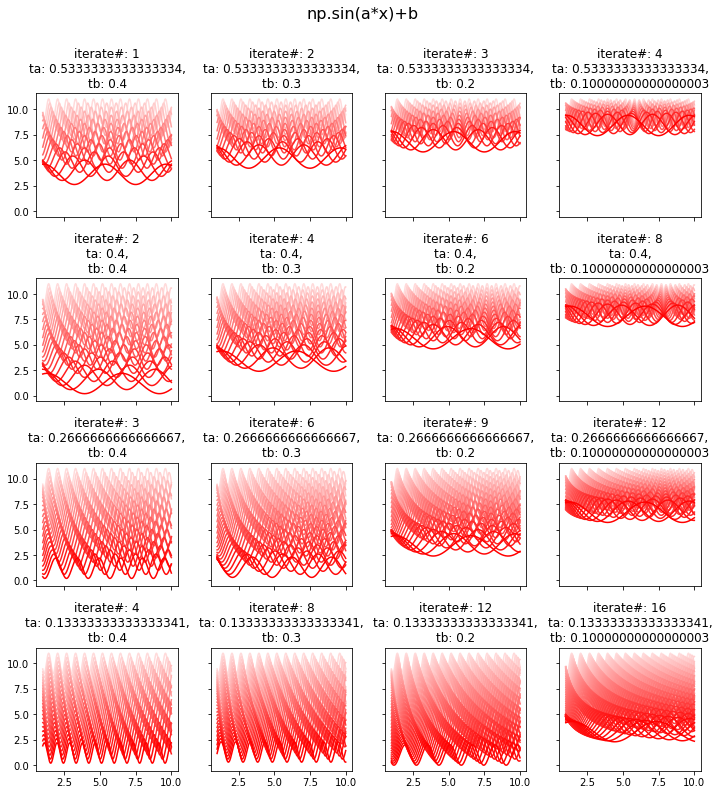

In [343]:
f = """
def func(a,b,da,db,x,ys):
  if (a < 1 or b < 1):
    return 0
  if (da >= 1 or db >= 1):
    return 0
  y = """+exps +"""\n
  ys.append(y)
    # ax.plot(x,y)
  return func("""+daexp+","+dbexp+""",da,db,x,ys)"""
exec(f)
xs = np.linspace(1,10,1000)
tys = []
#iterate times
das = 6
dbs = 6
#offsets
off_das = 2
off_dbs = 2
#init da,db
da_base = 0.8
db_base = 0.6
#change rate of da,db
sa = da_base / das 
sb =  db_base / dbs
#plot
fig,ax = plt.subplots(das-off_das,dbs-off_dbs,figsize=(10,10),sharey=True,sharex=True)
fig.suptitle(exps,color="k",
             x= 0.5, y= 1.1, 
             horizontalalignment='center', 
             verticalalignment='top',
             fontsize = 16)
# fig.subplots_adjust(top=1)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
for ta in range(das-off_das):
  for tb in range(dbs-off_dbs):
    ys = []
    func(10,10,da_base-(off_das+ta)*sa,db_base-(off_dbs+tb)*sb,xs,ys)
    red = Color("#ffdbdb")
    colors = list(map(lambda l: l.hex ,list(red.range_to(Color("red"),len(ys)))))
    for i,c in zip(ys,colors):
      ax[ta][tb].spines['bottom'].set_color('k')
      ax[ta][tb].spines['left'].set_color('k')
      ax[ta][tb].tick_params(axis='x', colors='k')
      ax[ta][tb].tick_params(axis='y', colors='k')
      ax[ta][tb].set_title("iterate#: {num}\nta: {ta},\ntb: {tb}".format(
          num=(ta+1)*(tb+1),
          ta=da_base-(off_das+ta)*sa,
          tb=db_base-(off_dbs+tb)*sb),
          color="k")
      
      ax[ta][tb].plot(xs,i,c)
# plt.ylim([0,40])
# plt.xlim([3,4])
plt.savefig('plot.png',bbox_inches = 'tight',)
plt.show()

<Figure size 432x288 with 0 Axes>